In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gc
import pickle
import numpy as np
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csc_matrix

原始数据预数理

In [728]:
df = pd.read_pickle('./userRating.pkl')

In [179]:
df['std'] = df.groupby(['userName'])['rating'].transform('std')

In [180]:
df.shape

(317367, 5)

In [181]:
df.nunique()

id          317367
tid           6461
userName      3518
rating          10
std           3461
dtype: int64

In [182]:
df.head()

,id,tid,userName,rating,std
1,2,tt8629748,ripcords,8.0,1.988060
6,7,tt8629748,TwistedContent,6.0,1.774006
17,18,tt8629748,ginocox-206-336968,4.0,2.111944
25,26,tt1051906,Bertaut,4.0,1.171547
34,35,tt1051906,MR_Heraclius,9.0,1.637006


In [91]:
df['std'].describe()

count    317367.000000
mean          1.967436
std           0.552066
min           1.000000
25%           1.584642
50%           1.912299
75%           2.284248
max           4.596785
Name: std, dtype: float64

In [83]:
userCount = df.groupby(['userName'])['userName'].count()
tidCount = df.groupby(['tid'])['tid'].count()

In [81]:
for i in range(2):
    userCount = df.groupby(['userName'])['userName'].count()
    df = df[df['userName'].isin(userCount[userCount>20].index)]
    
    tidCount = df.groupby(['tid'])['tid'].count()
    df = df[df['tid'].isin(tidCount[tidCount>20].index)]
    
    df = df[df['std']>1.0]

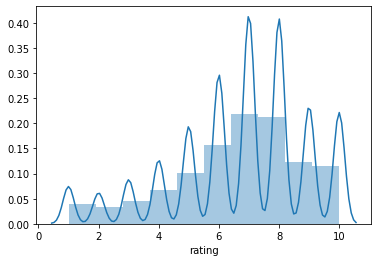

In [90]:
sns.distplot(df['rating'], hist=True, kde=True, rug=False, bins=10)

In [175]:
df.drop(['std'], axis=1, inplace=True)

In [177]:
df.to_pickle('./userRating.pkl')

构造 mini 数据集, 这里根据个人调整，代码只作参考

In [719]:
# train_set = df

In [816]:
for i in range(1):
    tidCount = train_set.groupby(['tid'])['tid'].count().sort_values()
    h = train_set.nunique()
    train_tid = tidCount[int(h.tid*0.2):].index
    train_set = train_set[train_set.tid.isin(train_tid)]
    
    userCount = train_set.groupby(['userName'])['userName'].count().sort_values()
    h = train_set.nunique()
    train_user = userCount[int(h.userName*0.1):].index
    train_set = train_set[train_set.userName.isin(train_user)]
    
    tidCount = train_set.groupby(['tid'])['tid'].count().sort_values()
    userCount = train_set.groupby(['userName'])['userName'].count().sort_values()
    
    train_set = train_set[train_set['std']>1.0]

In [818]:
train_set = train_set[train_set['tid'].isin(tidCount[tidCount>20].index)]

In [817]:
train_set = train_set[train_set['userName'].isin(userCount[userCount>20].index)]

In [819]:
train_set.shape

(149931, 9)

In [820]:
train_set.nunique()

id           149931
tid            3676
userName        647
rating           10
std             647
user_mean       639
tid_mean       2146
tid_enc        3676
user_enc        647
dtype: int64

In [821]:
tidCount = train_set.groupby(['tid'])['tid'].count().sort_values()
userCount = train_set.groupby(['userName'])['userName'].count().sort_values()
userCount

userName
muamba_eats_toast      52
kjproulx               62
cruise01               65
Pairic                 66
aimless-46             66
                     ... 
kosmasp              1332
gavin6942            1372
Quinoa1984           1448
claudio_carvalho     1480
SnoopyStyle          2940
Name: userName, Length: 647, dtype: int64

In [822]:
tidCount

tid
tt0076150    25
tt0974554    25
tt0074695    25
tt0082334    25
tt0074806    25
             ..
tt1409024    91
tt0079501    91
tt0094721    93
tt0046912    95
tt0066999    97
Name: tid, Length: 3676, dtype: int64

In [823]:
train_set['std'].describe()

count    149931.000000
mean          1.867086
std           0.461454
min           1.000880
25%           1.540789
50%           1.808896
75%           2.146815
max           3.987695
Name: std, dtype: float64

In [842]:
train_set.head()

,id,tid,userName,rating,std,user_mean,tid_mean,tid_enc,user_enc
44,45,tt7146812,MR_Heraclius,9.0,1.637006,7.773973,7.653846,3659,132
46,47,tt7146812,Alexander_Blanchett,8.0,1.140315,7.452055,7.653846,3659,11
47,48,tt7146812,masonsaul,8.0,1.918087,7.864706,7.653846,3659,489
49,50,tt7146812,martinrobertson300482,4.0,2.077539,6.489362,7.653846,3659,488
54,55,tt7146812,UniqueParticle,8.0,1.464594,9.087912,7.653846,3659,255


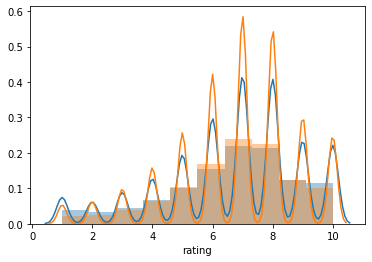

In [873]:
# sns.distplot(df['rating'], hist=True, kde=True, rug=False, bins=10, label='preprocess')
sns.distplot(train_set['rating'], hist=True, kde=True, rug=False, bins=10, label='mini')

In [844]:
train_set.drop(['std'], axis=1, inplace=True)

In [845]:
# train_set.to_pickle('./train_set.pkl')

In [846]:
train_set.head()

,id,tid,userName,rating
44,45,tt7146812,MR_Heraclius,9.0
46,47,tt7146812,Alexander_Blanchett,8.0
47,48,tt7146812,masonsaul,8.0
49,50,tt7146812,martinrobertson300482,4.0
54,55,tt7146812,UniqueParticle,8.0


关于Base line

In [2]:
train_set = pd.read_pickle('./train_set.pkl')

In [3]:
train_set.drop(['id'], axis=1, inplace=True)
train_set.drop_duplicates(inplace=True)
train_set.head()

,tid,userName,rating
44,tt7146812,MR_Heraclius,9.0
46,tt7146812,Alexander_Blanchett,8.0
47,tt7146812,masonsaul,8.0
49,tt7146812,martinrobertson300482,4.0
54,tt7146812,UniqueParticle,8.0


In [4]:
h = train_set.nunique()
h

tid         3676
userName     647
rating        10
dtype: int64

In [5]:
train_set['user_mean'] = train_set.groupby(['userName'])['rating'].transform('mean')
train_set['tid_mean'] = train_set.groupby(['tid'])['rating'].transform('mean')

here is baseline

In [6]:
print(np.mean(np.abs(train_set['rating'] - train_set['user_mean'])))
print(np.mean(np.abs(train_set['rating'] - train_set['tid_mean'])))

1.4584872396142203
1.3782860360645328


In [7]:
(train_set['rating'] - train_set['user_mean']).abs().describe()

count    149690.000000
mean          1.458487
std           1.190467
min           0.000000
25%           0.575758
50%           1.172043
75%           2.087146
max           8.595238
dtype: float64

In [8]:
(train_set['rating'] - train_set['tid_mean']).abs().describe()

count    149690.000000
mean          1.378286
std           1.158694
min           0.000000
25%           0.500000
50%           1.093023
75%           1.950000
max           8.156250
dtype: float64

In [9]:
train_set.groupby(['tid'])['rating'].std().describe()

count    3676.000000
mean        1.807565
std         0.354544
min         0.783120
25%         1.562176
50%         1.788066
75%         2.030666
max         3.458323
Name: rating, dtype: float64

构造稀疏矩阵

In [10]:
tid_label_encoder = LabelEncoder()
tid_label_encoder.fit(train_set['tid'])

user_label_encoder = LabelEncoder()
user_label_encoder.fit(train_set['userName'])

train_set['tid_enc'] = tid_label_encoder.transform(train_set['tid'])
train_set['user_enc'] = user_label_encoder.transform(train_set['userName'])

In [11]:
rows = train_set['user_enc'].values
columns = train_set['tid_enc'].values
data = train_set['rating'].values

user_item_matrix = csc_matrix((data, (rows, columns)), shape=(h.userName, h.tid))

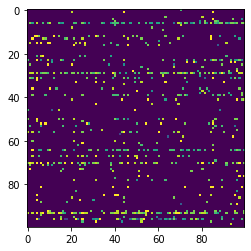

In [12]:
imagedata = user_item_matrix[:100, :100].todense()
plt.imshow(imagedata, interpolation='nearest')

数据集探索

In [857]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [879]:
svd_model = TruncatedSVD(n_components=100)
svd_model.fit(user_item_matrix)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=None, tol=0.0)

In [880]:
np.sum(svd_model.explained_variance_ratio_)

0.5334808654786606

In [881]:
svd_data = svd_model.transform(user_item_matrix)

In [882]:
tsne=TSNE(n_components=2)
raw_tsne = tsne.fit_transform(svd_data)

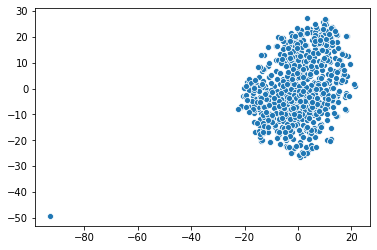

In [883]:
sns.scatterplot(raw_tsne[:, 0], raw_tsne[:, 1])
# 没效果，这个数据集单纯线性模型应该比较难

In [12]:
user_item_index_matrix = csc_matrix((np.ones(train_set.shape[0]), (rows, columns)), shape=(h.userName, h.tid))

In [13]:
i = np.random.choice(np.arange(0, h.userName, 1), 300, replace=False)
j = np.random.choice(np.arange(0, h.userName, 1), 300, replace=False)

In [14]:
cross_ratio = np.dot(user_item_index_matrix[i], user_item_index_matrix[j].T)
cross_ratio = cross_ratio.toarray().reshape(-1)

In [15]:
np.mean(cross_ratio)

15.034855555555556

基于 base-item 与 user-item 的 协同过滤

In [13]:
def UCF_ICF(row_enc, col_enc, user_item_matrix, k, cross_method, distance_method):  
    union_user_list = np.where(user_item_matrix[:, col_enc].toarray()>0)[0]

    if len(union_user_list)>0:
        est_user = user_item_matrix[row_enc].toarray().reshape([-1])
        est_user[col_enc] = 0.0
        if cross_method:
            est_user_index = (est_user>0).astype(np.int)
            
        simliary_list = []
        mean_list = []
        union_user = []
        for user in union_user_list:
            com_user = user_item_matrix[user].toarray().reshape([-1])
            com_user[col_enc] = 0.0
            
            est_user_v = est_user
            com_user_v = com_user
            
            if cross_method:
                com_user_index = (com_user>0).astype(np.int)
                cross_index = est_user_index*com_user_index
                
                if np.sum(cross_index)==0:
                    continue
                
                est_user_v = est_user[cross_index==1]
                com_user_v = com_user[cross_index==1]
            
            if distance_method=='Cosin':
                num = np.sum(est_user_v * com_user_v)
                denom = np.linalg.norm(est_user_v) * np.linalg.norm(com_user_v)
                sim = num / denom #余弦值 
            elif distance_method=='Person':
                sim = np.corrcoef(est_user_v, com_user_v)[0, 1]
            else:
                return None
            
            simliary_list.append(sim)
            mean_list.append(np.mean(com_user[com_user>0]))
            union_user.append(user)

        simliary_list = np.array(simliary_list)
        simliary_list = simliary_list[simliary_list>0.0]
        argindex = np.argsort(simliary_list)[-k:]
        
        sum_of_score = 0
        sum_of_similary = 0
        for index in argindex:
            sum_of_similary += simliary_list[index]
            sum_of_score += (user_item_matrix[union_user[index], col_enc]-mean_list[index])*simliary_list[index]
        return sum_of_score/sum_of_similary + np.mean(est_user[est_user>0]), simliary_list[argindex].mean()
        
    return None

In [17]:
# 当使用 user_item_matrix 时相当于 user 协同过滤
UCF_ICF(12, 96, user_item_matrix, k=5, cross_method=False, distance_method='Cosin')

(8.793449584480895, 0.18168576786874513)

In [170]:
# 当使用 item_user_matrix 时相当于 item 协同过滤
# item_user_matrix 相当于 user_item_matrix 的倒置
UCF_ICF(0, 0, user_item_matrix.T, k=5, cross_method=True, distance_method='Cosin')

(8.102160482160482, 1.0)

In [49]:
# 构造 test set 以评测
test_set = train_set[['tid_enc', 'user_enc', 'rating']].sample(1000, replace=False)

In [45]:
# 评测
user_rating_list = []
item_rating_list = []
user_rating_c_list = []
item_rating_c_list = []
real_rating = []
for index, row in tqdm(test_set.iterrows()):
    user_rating = UCF_ICF(int(row.user_enc), int(row.tid_enc), user_item_matrix, k=5, cross_method=False, distance_method='Cosin')[0]
    item_rating = UCF_ICF(int(row.tid_enc), int(row.user_enc), user_item_matrix.T, k=5, cross_method=False, distance_method='Cosin')[0]
    
    user_rating_c = UCF_ICF(int(row.user_enc), int(row.tid_enc), user_item_matrix, k=5, cross_method=True, distance_method='Cosin')[0]
    item_rating_c = UCF_ICF(int(row.tid_enc), int(row.user_enc), user_item_matrix.T, k=5, cross_method=True, distance_method='Cosin')[0]
    
    user_rating_list.append(user_rating)
    item_rating_list.append(item_rating)
    user_rating_c_list.append(user_rating_c)
    item_rating_c_list.append(item_rating_c)
    real_rating.append(row.rating)

1000it [03:36,  4.62it/s]


In [46]:
user_rating_list = np.array(user_rating_list)
item_rating_list = np.array(item_rating_list)
user_rating_c_list = np.array(user_rating_c_list)
item_rating_c_list = np.array(item_rating_c_list)
real_rating = np.array(real_rating)

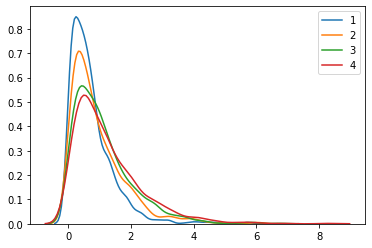

In [47]:
sns.distplot(np.abs(user_rating_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='1')
sns.distplot(np.abs(item_rating_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='2')
sns.distplot(np.abs(user_rating_c_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='3')
sns.distplot(np.abs(item_rating_c_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='4')

In [48]:
print('1 loss: %f'%np.mean(np.abs(user_rating_list-real_rating)))
print('2 loss: %f'%np.mean(np.abs(item_rating_list-real_rating)))
print('3 loss: %f'%np.mean(np.abs(user_rating_c_list-real_rating)))
print('4 loss: %f'%np.mean(np.abs(item_rating_c_list-real_rating)))

1 loss: 0.731567
2 loss: 0.938043
3 loss: 1.103552
4 loss: 1.244317


In [ ]:
test_set['1_rating'] = user_rating_list
test_set['2_rating'] = item_rating_list
test_set['3_rating'] = user_rating_c_list
test_set['4_rating'] = item_rating_c_list

In [27]:
test_set = pd.merge(test_set, train_set[['tid_enc', 'user_enc', 'user_mean', 'tid_mean']], on=['tid_enc', 'user_enc'], how='left')

In [32]:
test_set['1_diff'] = np.abs(test_set['1_rating'] - test_set['rating'])
test_set['2_diff'] = np.abs(test_set['2_rating'] - test_set['rating'])
test_set['3_diff'] = np.abs(test_set['3_rating'] - test_set['rating'])
test_set['4_diff'] = np.abs(test_set['4_rating'] - test_set['rating'])
test_set['user_diff'] = np.abs(test_set['user_mean'] - test_set['rating'])
test_set['item_diff'] = np.abs(test_set['tid_mean'] - test_set['rating'])

下图可以看出协同过滤使用了用户评分的均值所以包含了先验信息。

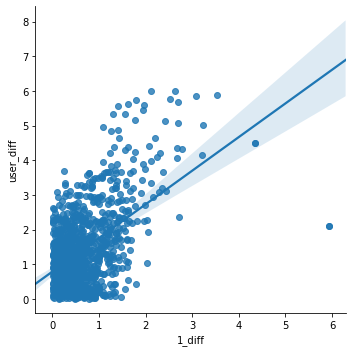

In [33]:
g = sns.lmplot('1_diff', 'user_diff', test_set)

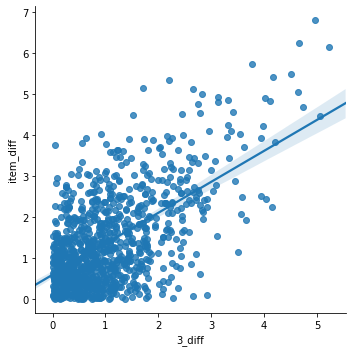

In [35]:
g = sns.lmplot('3_diff', 'item_diff', test_set)

### Netfliex Bias model 使用

#### 《The BellKor Solution to the Netflix Grand Prize》,Yehuda Koren, 2009.8
#### 《Matrix Factorization Techniques For Recommender Systems》,Yehuda Koren,Yahoo Research. Robert Bell and Chris Volinsky, AT&T Labs-Research

In [13]:
u = train_set['rating'].mean()
u

6.81404779531918

In [14]:
user_item_matrix_bias = user_item_matrix.toarray()
user_item_index_matrix = (user_item_matrix_bias>0).astype(np.int)

In [15]:
bias_item = (np.sum(user_item_matrix_bias*user_item_index_matrix, axis=0)/np.sum(user_item_index_matrix, axis=0))-u
bias_user = ((np.sum((user_item_matrix_bias-bias_item)*user_item_index_matrix, 1)/np.sum(user_item_index_matrix, 1))-u)

In [29]:
def UCF_ICF_Bias(row_enc, col_enc, user_item_matrix, k, cross_method, distance_method, bias_row, bias_col, u):  
    union_user_list = np.where(user_item_matrix[:, col_enc].toarray()>0)[0]

    if len(union_user_list)>0:
        est_user = user_item_matrix[row_enc].toarray().reshape([-1])
        est_user_index = est_user>0
        est_user[col_enc] = 0.0            
            
        simliary_list = []
        union_user = []
        for user in union_user_list:
            com_user = user_item_matrix[user].toarray().reshape([-1])
            com_user_index = com_user>0
            com_user[col_enc] = 0.0
            
            est_user_v = est_user
            com_user_v = com_user
            
            if cross_method:
                cross_index = (est_user_index.astype(np.int))*(com_user_index.astype(np.int))
                
                if np.sum(cross_index)==0:
                    continue
                
                est_user_v = est_user[cross_index==1]
                com_user_v = com_user[cross_index==1]
            
            if distance_method=='Cosin':
                num = np.sum(est_user_v * com_user_v)
                denom = np.sum(np.power(est_user_v,2))*np.sum(np.power(com_user_v,2))
                sim = num / np.sqrt(denom)
            elif distance_method=='Person':
                sim = np.corrcoef(est_user_v, com_user_v)[0, 1]
            else:
                return None
            simliary_list.append(sim)
            union_user.append(user)

        simliary_list = np.array(simliary_list)
        simliary_list = simliary_list[simliary_list>0.0]
        argindex = np.argsort(simliary_list)[-k:]
        
        sum_of_score = 0
        sum_of_similary = 0
        for index in argindex:
            sum_of_similary += simliary_list[index]
            sum_of_score += (user_item_matrix[union_user[index], col_enc]-u-bias_row[user]-bias_col[col_enc])*simliary_list[index]
        return sum_of_score/sum_of_similary +u+bias_row[row_enc]+bias_col[col_enc], simliary_list[argindex].mean()
        
    return None

In [30]:
UCF_ICF_Bias(0, 0, user_item_matrix, 5, False, 'Cosin', bias_user, bias_item, u)

(9.292805345696614, 0.161667604178244)

In [31]:
UCF_ICF_Bias(0, 0, user_item_matrix, 5, True, 'Cosin', bias_user, bias_item, u)

(8.382468147787712, 0.9954186534212038)

In [32]:
test_set = train_set[['tid_enc', 'user_enc', 'rating']].sample(1000, replace=False)
user_rating_list = []
item_rating_list = []
user_rating_c_list = []
item_rating_c_list = []
real_rating = []
for index, row in tqdm(test_set.iterrows()):
    user_rating = UCF_ICF_Bias(int(row.user_enc), int(row.tid_enc), user_item_matrix, 5, False, 'Cosin',bias_user, bias_item, u)[0]
    item_rating = UCF_ICF_Bias(int(row.tid_enc), int(row.user_enc), user_item_matrix.T, 5, False, 'Cosin', bias_item, bias_user, u)[0]
    
    user_rating_c = UCF_ICF_Bias(int(row.user_enc), int(row.tid_enc), user_item_matrix, 5, True, 'Cosin', bias_user, bias_item, u)[0]
    item_rating_c = UCF_ICF_Bias(int(row.tid_enc), int(row.user_enc), user_item_matrix.T, 5, True, 'Cosin', bias_item, bias_user, u)[0]
    
    user_rating_list.append(user_rating)
    item_rating_list.append(item_rating)
    user_rating_c_list.append(user_rating_c)
    item_rating_c_list.append(item_rating_c)
    real_rating.append(row.rating)

2it [00:00,  3.32it/s]D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater
1000it [03:39,  4.56it/s]


In [33]:
user_rating_list = np.array(user_rating_list)
item_rating_list = np.array(item_rating_list)
user_rating_c_list = np.array(user_rating_c_list)
item_rating_c_list = np.array(item_rating_c_list)
real_rating = np.array(real_rating)

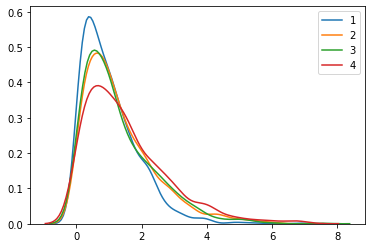

In [34]:
sns.distplot(np.abs(user_rating_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='1')
sns.distplot(np.abs(item_rating_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='2')
sns.distplot(np.abs(user_rating_c_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='3')
sns.distplot(np.abs(item_rating_c_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='4')

In [35]:
print('1 loss: %f'%np.mean(np.abs(user_rating_list-real_rating)))
print('2 loss: %f'%np.mean(np.abs(item_rating_list-real_rating)))
print('3 loss: %f'%np.mean(np.abs(user_rating_c_list-real_rating)))
print('4 loss: %f'%np.mean(np.abs(item_rating_c_list-real_rating)))

1 loss: 1.036730
2 loss: 1.326034
3 loss: 1.298440
4 loss: 1.535600


#### 我假定协同过滤的有效性很大程度源于均值先验，那去除均值先验会怎样?

In [18]:
def UCF_ICF_NoPrior(row_enc, col_enc, user_item_matrix, k, cross_method, distance_method):  
    union_user_list = np.where(user_item_matrix[:, col_enc].toarray()>0)[0]

    if len(union_user_list)>0:
        est_user = user_item_matrix[row_enc].toarray().reshape([-1])
        est_user[col_enc] = 0.0
        if cross_method:
            est_user_index = (est_user>0).astype(np.int)
            
        simliary_list = []
        union_user = []
        for user in union_user_list:
            com_user = user_item_matrix[user].toarray().reshape([-1])
            com_user[col_enc] = 0.0
            
            est_user_v = est_user
            com_user_v = com_user
            
            if cross_method:
                com_user_index = (com_user>0).astype(np.int)
                cross_index = est_user_index*com_user_index
                
                if np.sum(cross_index)==0:
                    continue
                
                est_user_v = est_user[cross_index==1]
                com_user_v = com_user[cross_index==1]
            
            if distance_method=='Cosin':
                num = np.sum(est_user_v * com_user_v)
                denom = np.linalg.norm(est_user_v) * np.linalg.norm(com_user_v)
                sim = num / denom #余弦值 
            elif distance_method=='Person':
                sim = np.corrcoef(est_user_v, com_user_v)[0, 1]
            else:
                return None
            
            simliary_list.append(sim)
            union_user.append(user)

        simliary_list = np.array(simliary_list)
        simliary_list = simliary_list[simliary_list>0.0]
        argindex = np.argsort(simliary_list)[-k:]
        
        sum_of_score = 0
        sum_of_similary = 0
        for index in argindex:
            sum_of_similary += simliary_list[index]
            sum_of_score += user_item_matrix[union_user[index], col_enc]*simliary_list[index]
        return sum_of_score/sum_of_similary, simliary_list[argindex].mean()
        
    return None

In [21]:
UCF_ICF_NoPrior(1, 149, user_item_matrix, k=5, cross_method=True, distance_method='Cosin')

(7.402327432418796, 0.9819181875817925)

In [50]:
user_rating_list = []
item_rating_list = []
user_rating_c_list = []
item_rating_c_list = []
real_rating = []
for index, row in tqdm(test_set.iterrows()):
    user_rating = UCF_ICF_NoPrior(int(row.user_enc), int(row.tid_enc), user_item_matrix, k=5, cross_method=False, distance_method='Cosin')[0]
    item_rating = UCF_ICF_NoPrior(int(row.tid_enc), int(row.user_enc), user_item_matrix.T, k=5, cross_method=False, distance_method='Cosin')[0]
    
    user_rating_c = UCF_ICF_NoPrior(int(row.user_enc), int(row.tid_enc), user_item_matrix, k=5, cross_method=True, distance_method='Cosin')[0]
    item_rating_c = UCF_ICF_NoPrior(int(row.tid_enc), int(row.user_enc), user_item_matrix.T, k=5, cross_method=True, distance_method='Cosin')[0]
    
    user_rating_list.append(user_rating)
    item_rating_list.append(item_rating)
    user_rating_c_list.append(user_rating_c)
    item_rating_c_list.append(item_rating_c)
    real_rating.append(row.rating)

1000it [03:09,  5.29it/s]


In [51]:
user_rating_list = np.array(user_rating_list)
item_rating_list = np.array(item_rating_list)
user_rating_c_list = np.array(user_rating_c_list)
item_rating_c_list = np.array(item_rating_c_list)
real_rating = np.array(real_rating)

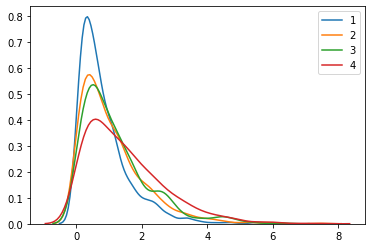

In [52]:
sns.distplot(np.abs(user_rating_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='1')
sns.distplot(np.abs(item_rating_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='2')
sns.distplot(np.abs(user_rating_c_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='3')
sns.distplot(np.abs(item_rating_c_list-real_rating), hist=False, kde=True, rug=False, bins=100, label='4')

In [53]:
print('1 loss: %f'%np.mean(np.abs(user_rating_list-real_rating)))
print('2 loss: %f'%np.mean(np.abs(item_rating_list-real_rating)))
print('3 loss: %f'%np.mean(np.abs(user_rating_c_list-real_rating)))
print('4 loss: %f'%np.mean(np.abs(item_rating_c_list-real_rating)))

1 loss: 0.852825
2 loss: 1.091901
3 loss: 1.199666
4 loss: 1.472180
